In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('criminal_train.csv')
test = pd.read_csv('criminal_test.csv')

In [3]:
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [5]:
print("column      null    max    min    unique")
for col in train.columns:
    print("{0}   {1}      {2}      {3}      {4}".format(col, (train[col] == -1).sum(), train[col].max(), train[col].min(), train[col].nunique()))

column      null    max    min    unique
PERID   0      99999555      10002216      45718
IFATHER   2      4      -1      5
NRCH17_2   84      3      -1      5
IRHHSIZ2   2      6      -1      7
IIHHSIZ2   2      3      -1      3
IRKI17_2   2      4      -1      5
IIKI17_2   2      3      -1      3
IRHH65_2   2      3      -1      4
IIHH65_2   2      3      -1      4
PRXRETRY   2      99      -1      6
PRXYDATA   2      99      -1      7
MEDICARE   2      98      -1      7
CAIDCHIP   2      98      -1      7
CHAMPUS   2      98      -1      7
PRVHLTIN   2      98      -1      7
GRPHLTIN   2      99      -1      8
HLTINNOS   2      99      -1      7
HLCNOTYR   2      99      -1      8
HLCNOTMO   2      99      -1      18
HLCLAST   2      99      -1      10
HLLOSRSN   2      99      -1      18
HLNVCOST   2      99      -1      7
HLNVOFFR   2      99      -1      7
HLNVREF   2      99      -1      7
HLNVNEED   2      99      -1      7
HLNVSOR   2      99      -1      7
IRMCDCHP   2      2

In [6]:
print("column      null    max    min    unique")
for col in test.columns:
    print("{0}   {1}      {2}      {3}      {4}".format(col, (test[col] == -1).sum(), test[col].max(), test[col].min(), test[col].nunique()))

column      null    max    min    unique
PERID   0      99994900      10001919      11430
IFATHER   0      4      1      4
NRCH17_2   8      3      -1      5
IRHHSIZ2   0      6      1      6
IIHHSIZ2   0      3      1      2
IRKI17_2   0      4      1      4
IIKI17_2   0      3      1      2
IRHH65_2   0      3      1      3
IIHH65_2   0      3      1      3
PRXRETRY   0      99      2      4
PRXYDATA   0      99      1      5
MEDICARE   0      98      1      6
CAIDCHIP   0      98      1      6
CHAMPUS   0      98      1      6
PRVHLTIN   0      98      1      6
GRPHLTIN   0      99      1      7
HLTINNOS   0      99      1      6
HLCNOTYR   0      99      1      7
HLCNOTMO   0      99      1      16
HLCLAST   0      99      1      9
HLLOSRSN   0      99      1      17
HLNVCOST   0      99      1      5
HLNVOFFR   0      99      1      5
HLNVREF   0      99      1      5
HLNVNEED   0      99      1      5
HLNVSOR   0      99      1      5
IRMCDCHP   0      2      1      2
IIMCDCHP   

In [4]:
train.shape

(45718, 72)

In [5]:
test.shape

(11430, 71)

In [3]:
all_data = train.append(test, ignore_index=True)

In [4]:
one_hot_columns = [i for i in all_data.columns if i not in ['PERID', 'Criminal', 'ANALWT_C']]

In [15]:
ohc_size = 0
for col in one_hot_columns:
    ohc_size += all_data[col].nunique()

In [16]:
ohc_size

401

In [17]:
len(one_hot_columns)

69

In [18]:
# total 70 columns to 402 columns in autoencoder

In [19]:
all_data.shape

(57148, 72)

In [5]:
oh_ae_data = pd.DataFrame(index=np.arange(0, 57148))

In [6]:
for col in one_hot_columns:
    data = pd.get_dummies(all_data[col])
    oc = data.columns.tolist()
    fc = []
    for c in oc:
        fc.append(col + '#' +str(c))
    data.columns = fc
    oh_ae_data = oh_ae_data.join(data)

In [7]:
oh_ae_data['ANALWT_C'] = (all_data['ANALWT_C'] - all_data['ANALWT_C'].min()) / (all_data['ANALWT_C'].max() - all_data['ANALWT_C'].min())

In [8]:
oh_ae_data.head()

,AIIND102#-1,AIIND102#1,AIIND102#2,ANYHLTI2#-1,ANYHLTI2#1,ANYHLTI2#2,ANYHLTI2#94,ANYHLTI2#97,ANYHLTI2#98,CAIDCHIP#-1,...,VESTR#40042,VESTR#40043,VESTR#40044,VESTR#40045,VESTR#40046,VESTR#40047,VESTR#40048,VESTR#40049,VESTR#40050,ANALWT_C
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.035616
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.014923
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.039834
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.007273
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.013924


In [9]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
input_size = 402
hidden_size = 28
code_size = 8

input_person = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_person)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_person = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_person, output_person)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(oh_ae_data.values, oh_ae_data.values, epochs=20, verbose=0)

In [11]:
autoencoder.evaluate(oh_ae_data.values, oh_ae_data.values)

56640/57148 [============================>.] - ETA: 0s 

0.04075882518252674

In [12]:
W1 = autoencoder.get_weights()[0]
b1 = autoencoder.get_weights()[1]
W2 = autoencoder.get_weights()[2]
b2 = autoencoder.get_weights()[3]

In [13]:
enc_person = np.dot((np.dot(oh_ae_data.values, W1) + b1), W2) + b2

In [24]:
train_enc = enc_person[0: train.shape[0]]

In [25]:
test_enc = enc_person[train.shape[0] :]

In [26]:
train_df = pd.DataFrame(train_enc)

In [27]:
test_df = pd.DataFrame(test_enc)

In [29]:
train_df.describe()

,0,1,2,3,4,5,6,7
count,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000
mean,18.729009,7.104348,17.746990,19.041952,14.758255,15.621434,13.658195,19.272325
std,12.528100,3.181714,9.110384,12.866560,11.074123,11.116469,10.596909,9.341804
min,-32.189196,-2.726226,-9.761135,-55.690403,-79.016546,-90.167804,-82.419006,-90.604494
25%,12.138193,4.854808,11.065012,9.863542,8.238451,9.220557,7.247336,14.568972
50%,16.066072,7.038187,16.549917,16.289588,17.071959,16.688206,16.836075,20.030442
75%,21.063985,9.210888,23.332606,26.562749,23.389415,22.896995,21.947209,25.261351
max,85.718764,18.924462,55.771428,73.566030,36.021938,37.814821,30.332566,49.332788


In [31]:
train_df['PERID'] = train['PERID']
train_df['Criminal'] = train['Criminal']
test_df['PERID'] = test['PERID']

In [33]:
train_df.to_csv('train_enc0.csv', index=False, encoding='utf-8')
test_df.to_csv('test_enc0.csv', index=False, encoding='utf-8')

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [35]:
import xgboost as xgb

In [80]:
feature_names = [i for i in test_df.columns if i not in ['PERID']]

In [81]:
feature_names

[0, 1, 2, 3, 4, 5, 6, 7]

In [43]:
def modelfit(model, train_data, train_label, predictors, eval_metric, useTrainCV=True, cv_folds=10, early_stopping_rounds=100):
    
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        params = {
            'objective' : xgb_param['objective'],
            'base_score' : xgb_param['base_score'],
            'colsample_bylevel' : xgb_param['colsample_bylevel'],
            'colsample_bytree' : xgb_param['colsample_bytree'],
            'gamma' : xgb_param['gamma'],
            'eta' : xgb_param['learning_rate'],
            'max_delta_step' : xgb_param['max_delta_step'],
            'max_depth' : xgb_param['max_depth'],
            'min_child_weight' : xgb_param['min_child_weight'],
            'alpha' : xgb_param['reg_alpha'],
            'lambda': xgb_param['reg_lambda'],
            'scale_pos_weight' : xgb_param['scale_pos_weight'],
            'subsample' : xgb_param['subsample'],     
        }
           
        dtrain = xgb.DMatrix(data=train_data[predictors], label=train_label)
        cvresult = xgb.cv(params , dtrain, num_boost_round=model.get_params()['n_estimators'], stratified=True, nfold=cv_folds, metrics=eval_metric, early_stopping_rounds=early_stopping_rounds)
        model.set_params(n_estimators=cvresult.shape[0])
        # print(cvresult)
        print("########### n_estimators = %f" % cvresult.shape[0])
    
    # Fit the algorithm on the data
    model.fit(train_data[predictors], train_label,eval_metric=eval_metric)
        
    # Predict training set:
    train_predictions = model.predict(train_data[predictors])
    train_predprob = model.predict_proba(train_data[predictors])[:,1]
    
    # Predict X_valid set:
    #valid_predictions = model.predict(X_valid[predictors])
    #valid_predprob = model.predict_proba(X_valid[predictors])[:,1]
        
    # Print model report:
    print("\nModel Report")
    print("Accuracy score (Train): %.5g" % accuracy_score(train_label, train_predictions))
    print("precision score (Train): %.5g" % precision_score(train_label, train_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(train_label, train_predprob))
    # print("AUC Score (Validation): %f" % roc_auc_score(y_valid, valid_predprob))
    
    feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return model

In [44]:
clf1 = xgb.XGBClassifier(objective ='reg:logistic',learning_rate=0.1, max_depth=4, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, gamma=0, min_child_weight= 1, reg_alpha=0, scale_pos_weight=(42543/3175))

########### n_estimators = 1.000000

Model Report
Accuracy score (Train): 0.69299
precision score (Train): 0.17138
AUC Score (Train): 0.829017


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<IPython.core.display.Javascript object>


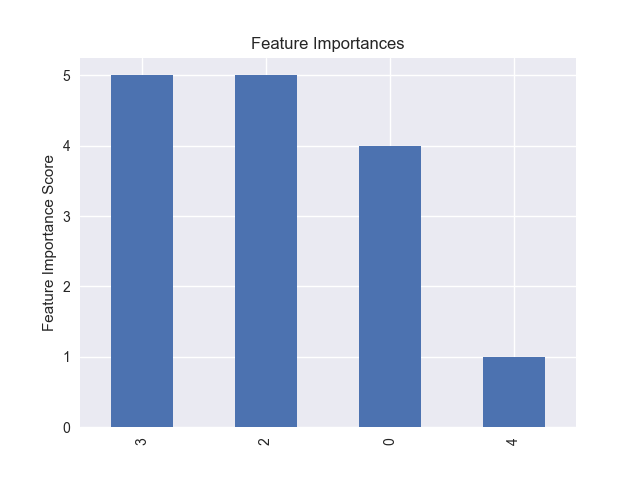

In [45]:
clf1 = modelfit(clf1, train_df, train_df['Criminal'], feature_names, 'map')

In [69]:
sub = pd.DataFrame(test_df['PERID'][0:11340].values.astype(int), columns=['PERID'])

In [70]:
sub = clf1.predict(test_df[feature_names].values)

ValueError: feature_names mismatch: ['0', '1', '2', '3', '4', '5', '6', '7'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
expected 3, 5, 7, 4, 2, 1, 0, 6 in input data
training data did not have the following fields: f3, f0, f2, f7, f4, f6, f1, f5

In [84]:
oh_ae_data.to_csv('all_oh.csv', index=False, encoding='utf-8')